In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("S02-hw-dataset.csv")
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [28]:
print(df.info(), "\nКоличество пропусков\n", df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None 
Количество пропусков
 user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [35]:
print(f"Процент пропусков \n{df.isna().mean()}")

Процент пропусков 
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [36]:
[print(f"Уникальные значения: [{idx}] {col} - {df[col].unique()}") for idx, col in enumerate(df.columns)]

Уникальные значения: [0] user_id - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Уникальные значения: [1] age - [ 25.  24.  52.  31.  nan 120.  46.  28.  39.  20.  36.  57.  22.  32.
  47.   5.  33.  42.  21.  35.  54.  43.  55.  26.  23.  45.  51.  18.
  34.]
Уникальные значения: [2] country - ['FR' 'RU' 'DE' 'CN' 'US']
Уникальные значения: [3] purchases - [ 7  5  6 -1  0  2  4  9  3  8 11  1]
Уникальные значения: [4] revenue - [ 749 1115  399  654 1296  785    0  456  980  511 1652  630 2358  693
  183 1608  432  442 1488  546  904 2475  650  330 1302  828 1440  702
  142 1080  445  404  342 1104  738 1162 2086]


[None, None, None, None, None]

In [42]:
print("Количество дублирующихся строк - ", df.duplicated().sum())
df.loc[df.duplicated()]

Количество дублирующихся строк -  1


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [54]:
testdf = df.loc[:, (df.columns != 'id') & (df.columns != 'country')]
usl = (testdf < 0).any(axis=1)
df.loc[usl] #проверка значений меньше нуля

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [58]:
df.loc[(df['age']>100) | (df['age']<18)] #возраст больше 100 или меньше 18

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


In [56]:
df.loc[((df['revenue'] == 0) & (df['purchases'] >0)) | ((df['revenue'] > 0) & (df['purchases'] == 0))]
#если доход больше нуля, а покупок не было, или доход нулевой при наличии покупок

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


Обнаруженные проблемы качества данных:
* Пропуски в столбце возраста
* Полностью дублирующаяся строка
* Строка со значением меньше нуля, там где такого быть не может
* Строки с нелогичным возрастом(120 и 5 лет)
* Строка, где доход нулевой при наличии покупок

In [59]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [62]:
df.groupby('country').agg({
    'revenue': ['mean', 'sum', 'min', 'max', 'count'],
    'purchases': ['sum', 'mean'],
    'age': 'mean'
})

revenue                         purchases                  age
                mean    sum  min   max count       sum      mean       mean
country                                                                    
CN       1054.000000   2108  456  1652     2         9  4.500000  24.000000
DE       1445.500000   8673  702  2475     6        39  6.500000  34.600000
FR        675.916667   8111    0  1608    12        51  4.250000  46.250000
RU        790.076923  10271    0  2086    13        62  4.769231  30.076923
US        557.375000   4459    0   980     8        37  4.625000  36.714286

In [72]:
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print(df.value_counts('age_group'))
df.groupby('age_group').agg({
    'revenue': ['mean'],
    'purchases': ['mean']
})


age_group
19-30    14
31-45    13
46-60    10
0-18      1
60+       0
Name: count, dtype: int64


C:\Users\ivasi\AppData\Local\Temp\ipykernel_7244\3371462182.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group').agg({


,revenue,purchases
,mean,mean
age_group,,
0-18,1488.000000,8.000000
19-30,604.000000,4.428571
31-45,1162.384615,5.615385
46-60,585.600000,4.100000
60+,NaN,NaN


Основной аудиторией являются категория людей среднего возраста(31-45) и молодежи(19-30). Среднее значение дохода у молодежи значительно ниже такого же показателя у людей среднего возраста, а у человек постарше оно куда ниже обеих категорий. Помимо этого, отсуствуют данные по людям 60+ и одно единственное значение для возрастной категории меньше 18, которое определяет всю статистику по ней.

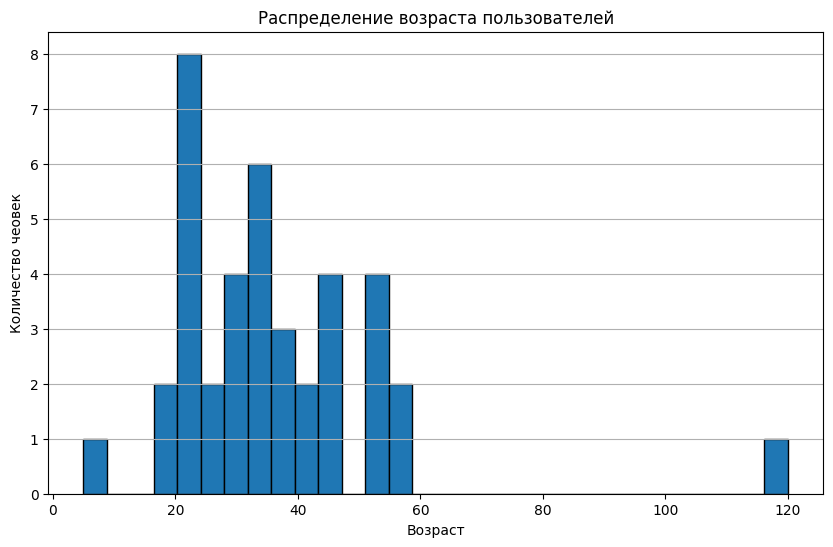

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество чеовек')
plt.title('Распределение возраста пользователей')
plt.grid(axis='y')

<Figure size 1000x600 with 0 Axes>

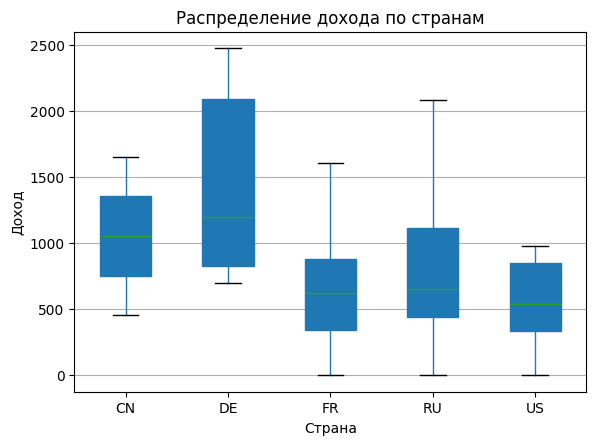

In [101]:
plt.figure(figsize=(10, 6))
df.boxplot(column='revenue', by='country', grid=False, patch_artist=True)
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.title('Распределение дохода по странам')
plt.suptitle('')
plt.grid(axis='y', alpha=1)
plt.show()

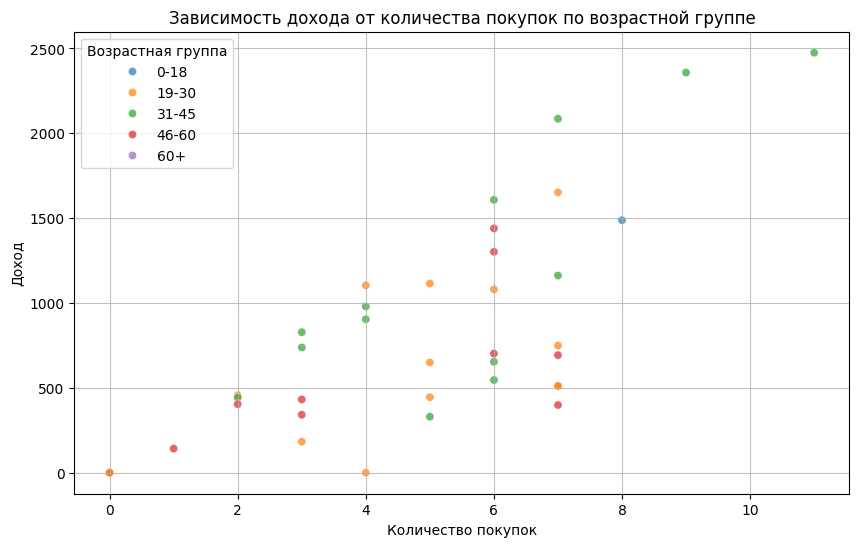

In [110]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchases', y='revenue', hue = 'age_group', data = df, alpha = 0.7)
plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.title('Зависимость дохода от количества покупок по возрастной группе')
plt.legend(title='Возрастная группа')
plt.grid(alpha=0.8)

plt.savefig('figures/scatter_plot.png') 
plt.show()